In [1]:
# Import Library

import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [2]:
# Connection MongoDB Database

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["ad-click-customer-prediction"]
mycol = mydb["train-data"]

In [3]:
# Import Dataset

df = pd.DataFrame(list(mycol.find()))
df

,_id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,6124914e53aeec21a8aecec6,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,3/27/2016 0:53,0
1,6124914e53aeec21a8aecec7,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,4/4/2016 1:39,0
2,6124914e53aeec21a8aecec8,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,3/13/2016 20:35,0
3,6124914e53aeec21a8aecec9,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,1/10/2016 2:31,0
4,6124914e53aeec21a8aececa,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,6124914f53aeec21a8aed2a9,72.97,30,71384.57,208.58,Fundamental modular algorithm,1,Lebanon,2/11/2016 21:49,1
996,6124914f53aeec21a8aed2aa,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,6124914f53aeec21a8aed2ab,51.63,51,42415.72,120.37,Expanded intangible solution,1,Mongolia,2/1/2016 17:24,1
998,6124914f53aeec21a8aed2ac,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,0,Guatemala,3/24/2016 2:35,0


In [4]:
# Data Exploration

df.head(10)

,_id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,6124914e53aeec21a8aecec6,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,3/27/2016 0:53,0
1,6124914e53aeec21a8aecec7,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,4/4/2016 1:39,0
2,6124914e53aeec21a8aecec8,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,3/13/2016 20:35,0
3,6124914e53aeec21a8aecec9,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,1/10/2016 2:31,0
4,6124914e53aeec21a8aececa,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,6/3/2016 3:36,0
5,6124914e53aeec21a8aececb,59.99,23,59761.56,226.74,Sharable client-driven software,1,Norway,5/19/2016 14:30,0
6,6124914e53aeec21a8aececc,88.91,33,53852.85,208.36,Enhanced dedicated support,0,Myanmar,1/28/2016 20:59,0
7,6124914e53aeec21a8aececd,66.00,48,24593.33,131.76,Reactive local challenge,1,Australia,3/7/2016 1:40,1
8,6124914e53aeec21a8aecece,74.53,30,68862.00,221.51,Configurable coherent function,1,Grenada,4/18/2016 9:33,0
9,6124914e53aeec21a8aececf,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,1,Ghana,7/11/2016 1:42,0


In [5]:
# Drop Column _Id

df = df.drop(columns=['_id'])
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,1,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,1,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,1,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,1,Ghana,7/11/2016 1:42,0


In [6]:
# Information About Feature in Dataset

for col in df.columns:
    print(col)

Daily Time Spent on Site
Age
Area Income
Daily Internet Usage
Ad Topic Line
Male
Country
Timestamp
Clicked on Ad


In [7]:
# Information Value About Data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Timestamp                 1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

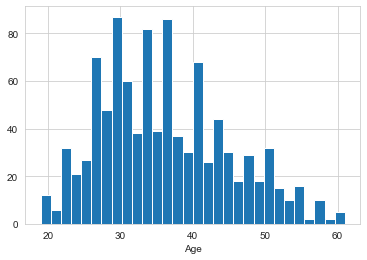

In [8]:
# Information About Age Visualization

sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

In [9]:
# Information About Country Click

pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)

Clicked on Ad,0,1
Country,,
Slovakia (Slovak Republic),2,0
Lesotho,1,0
Malaysia,3,0
Mozambique,1,0
Nepal,3,0
Nicaragua,3,0
Niue,3,0
Reunion,2,0
Panama,2,0


In [10]:
# Information About Value Count Country Click == 1

df[df['Clicked on Ad']==1]['Country'].value_counts().head(10)

Ethiopia         7
Australia        7
Turkey           7
Liberia          6
South Africa     6
Liechtenstein    6
Afghanistan      5
Hungary          5
Peru             5
France           5
Name: Country, dtype: int64

In [11]:
# Information About Country Value Count

df['Country'].value_counts().head(10)

France            9
Czech Republic    9
Senegal           8
Peru              8
Turkey            8
Micronesia        8
Cyprus            8
Liberia           8
Afghanistan       8
South Africa      8
Name: Country, dtype: int64

In [12]:
# Information About Country with Count

pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [13]:
# Check Data Isnull

df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [14]:
# Variable Timestamp Encoding

type(df['Timestamp'][1])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Extract datetime variables using timestamp column
df['Month'] = df['Timestamp'].dt.month  # Converting timestamp column into datatime object in order to extract new features

df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df["Weekday"] = df['Timestamp'].dt.dayofweek

In [15]:
# Dropping timestamp column to avoid redundancy

df = df.drop(['Timestamp'], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,0,6,3,3,4


In [16]:
# Split Data Between Feature and Class

X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
print(X)
print(y)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
995    1


In [18]:
# Split Data Based on Test Data and Train Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [21]:
# Logistic Regression Algorithm and Evaluate Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy : ", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

Accuracy :  0.9818181818181818


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Decision Tree Algorithm and Evaluate Decision Tree

logmodel = DecisionTreeClassifier()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy : ", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       171
           1       0.94      0.96      0.95       159

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

Accuracy :  0.9484848484848485


In [23]:
# Gradient Boosting Algorithm and Evaluate Gradient Boosting

logmodel = GradientBoostingClassifier()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy : ",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       171
           1       0.94      0.95      0.94       159

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

Accuracy :  0.9454545454545454


In [24]:
# Random Forest Algorithm and Evaluate Random Forest

logmodel = RandomForestClassifier()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy : ",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       171
           1       0.96      0.95      0.96       159

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

Accuracy :  0.9575757575757575
